In [1]:
import nltk
import random
import pandas as pd
import numpy as np
from sklearn.feature_extraction import DictVectorizer
from sklearn.feature_extraction.text import HashingVectorizer
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import classification_report
from nltk.corpus import names

In [3]:
text=str(input())

Following the events after busting the illegal consignment of Adaikalam and Anbu by Inspector Bejoy,[a] Amar, the head of a black-ops team, is summoned by Police Chief Jose to bring justice to a group of masked vigilantes, who have killed Stephen Raj (following his arrest and subsequent release),[a] ACP Prabhanjan and his adopted father, Karnan. Amar leads the investigation by digging into Karnan's life, whose murder seems out of place, as Karnan was a common man and the other two were higher officials in the Narcotics division. He learns about Karnan's past as a drunkard, drug addict, and womaniser, but is very close to his adopted infant grandson. While investigating, Amar learns about the missing containers needed by Sandhanam, who is part of a large family and runs a crime syndicate named Vetti Vagaiyara. Sandhanam wants the drugs to be delivered to his cold-blooded smuggler boss named Rolex, whose identity is unknown. If the drugs are delivered, Rolex will help Sandhanam form his 

In [4]:
from nltk.corpus import names
Male_Names = names.words('male.txt')
Female_Names = names.words('female.txt')
print('Sample Male Names:-   ',Male_Names[0:5])
print('Sample Female Names:- ',Female_Names[0:5])

Sample Male Names:-    ['Aamir', 'Aaron', 'Abbey', 'Abbie', 'Abbot']
Sample Female Names:-  ['Abagael', 'Abagail', 'Abbe', 'Abbey', 'Abbi']


In [5]:
Name_List = [(Name , 'male') for Name in Male_Names] + [(Name , 'female') for Name in Female_Names]
print(Name_List[:5],'\n')
print(Name_List[-5:])
random.shuffle(Name_List)
print('\n       Suffled names:-')
Name_List[-5:]

[('Aamir', 'male'), ('Aaron', 'male'), ('Abbey', 'male'), ('Abbie', 'male'), ('Abbot', 'male')] 

[('Zorine', 'female'), ('Zsa Zsa', 'female'), ('Zsazsa', 'female'), ('Zulema', 'female'), ('Zuzana', 'female')]

       Suffled names:-


[('Sivert', 'male'),
 ('Teddy', 'female'),
 ('Pennie', 'male'),
 ('Oscar', 'male'),
 ('Dix', 'female')]

In [6]:
def Name_Feature (name):
    return {
        'last_char': name[-1],
        'last_two_char': name[-2:],
        'last_three_char': name[-3:],
        'first_char': name[0],
        'first_two_char': name[:2],
        'first_three_char': name[:3]
    }

features = [ (Name_Feature(name= NAME), Gender) for (NAME, Gender) in Name_List ]
features[:1]

[({'last_char': 'a',
   'last_two_char': 'ia',
   'last_three_char': 'lia',
   'first_char': 'T',
   'first_two_char': 'Th',
   'first_three_char': 'Tha'},
  'female')]

In [7]:
Training_Set = features[ :round(len(features) * .7)]
Testing_Set = features[round(len(features) * .7): ]

print(len(Training_Set))
print(len(Testing_Set))

5561
2383


In [8]:
classifier = nltk.NaiveBayesClassifier.train(Training_Set)

In [9]:
round(nltk.classify.accuracy(classifier , Testing_Set) * 100, 2)

82.0

In [10]:

Final_Classifier_Model = nltk.NaiveBayesClassifier.train(features)

In [11]:
import pickle
import os
with open('Final_Classifier_Model.pkl', 'wb') as fileWriteStream:
    pickle.dump(Final_Classifier_Model, fileWriteStream)
    fileWriteStream.close()
    
print('pickle file of Predictive Model is saved at Location:',os.getcwd())

pickle file of Predictive Model is saved at Location: C:\Users\Thispc


In [12]:
def Identify_Person_Gender(Text):
    import re
    import pandas as pd
    import nltk
    from nltk.tokenize import word_tokenize, sent_tokenize
    import pickle
    with open('Final_Classifier_Model.pkl', 'rb') as fileReadStream:
        Prediction_Model=pickle.load(fileReadStream)
        fileReadStream.close() 
        
    Final_Name= []
    Final_Gender= []
    Sent_List = sent_tokenize(Text.title())
    
    for sent in Sent_List:
        word_list = word_tokenize(sent)
        pos_tags = nltk.pos_tag(word_list)
        Person_Name= [name[0] for name in pos_tags if name[1] in ['NNP','NN']]
        Person_Name= re.sub(r'[^a-z A-Z . ,]',r'',str(Person_Name))

        Person_Name_feature= {  'last_char': Person_Name[-1],
                                'last_two_char': Person_Name[-2:],
                                'last_three_char': Person_Name[-3:],
                                'first_char': Person_Name[0],
                                'first_two_char': Person_Name[:2],
                                'first_three_char': Person_Name[:3] 
                             } 
        Gender_Prediction=Prediction_Model.classify(Person_Name_feature)
        
        Final_Name.append(Person_Name)
        Final_Gender.append(Gender_Prediction)        
    
    prediction_result= pd.DataFrame({'Name':Final_Name, 'Gender': Final_Gender})
    
    return(prediction_result)

In [13]:
tab= Identify_Person_Gender(text)
tab

,Name,Gender
0,"Illegal, Consignment, Adaikalam, Anbu, Inspect...",male
1,"Amar, Investigation, Into, Karnan, Life, Whose...",male
2,"Karnan, Past, A, Drunkard, Drug, Addict, Woman...",male
3,"Investigating, Amar, Learns, Missing, Containe...",female
4,"Sandhanam, Drugs, Smuggler, Boss, Named, Rolex...",male
5,"Drugs, Are, Delivered, Rolex, Will, Help, Sand...",male
6,"Veerapandian, Who, A, Pwd, Officer, Assigns, A...",male
7,"Masked, Men, Arrive, Kill, Veerapandian",male
8,"Veerapandian, Target, Masked, Men, A, Chip, Ka...",male
9,"Amar, Chases, Them, Successfully, Captures, On...",female


In [14]:
import spacy
nlp = spacy.load('en_core_web_sm')

In [15]:
doc = nlp(text)
d=[]
for ent in doc.ents:
    d.append(ent.text)
print(d)

['Adaikalam', 'Jose', 'Stephen Raj', 'Karnan', 'Amar', 'Karnan', 'Karnan', 'two', 'Narcotics', 'Karnan', 'Amar', 'Sandhanam', 'Vetti', 'Vagaiyara', 'Sandhanam', 'Rolex', 'Rolex', 'Veerapandian', 'PWD', 'Rudra Pratap', 'Rolex', 'Sandhanam', 'Veerapandian', 'Veerapandian', 'Karnan', 'Bejoy', 'Bejoy', 'Rudra Pratap', 'Amar', "Rudra Pratap's", 'Rudra Pratap', 'Sandhanam', "Rudra Pratap's", 'Rudra Pratap', 'Rudra Pratap', 'Sandhanam', 'Sandhanam', 'Amar', 'Sandhanam', 'Karnan', 'Rudra Pratap', 'Karnan', 'Vikram', 'Pilot Black', 'Vikram', 'eleven', '1991', 'Vikram', 'three', 'Jose', 'Jose', 'Sandhanam', 'Prabhanjan', 'Santhanam', 'Jose', 'Santhanam', 'Prabhanjan', 'Jose', 'Veerapandian', 'Rudra Pratap', 'Sandhanam', 'Sandhanam', 'Jose', 'Jose', 'Vikram', 'Amar', 'Sandhanam', 'Vikram', 'Bejoy', 'Amar', 'Gayathri', 'Vikram', 'Prabhanjan', 'Vikram', 'Vikram', 'Pilot Black', 'Valliamma', 'Vikram', 'Gayathri', 'Amar', 'Vikram', 'Sandhanam', 'Jose', 'Gayathri', 'Vikram', 'Prabhanjan', 'Prabhanjan'

In [16]:
def listToString(s):
    str1 = " " 
    return (str1.join(s))  
s=d
print(listToString(s))

Adaikalam Jose Stephen Raj Karnan Amar Karnan Karnan two Narcotics Karnan Amar Sandhanam Vetti Vagaiyara Sandhanam Rolex Rolex Veerapandian PWD Rudra Pratap Rolex Sandhanam Veerapandian Veerapandian Karnan Bejoy Bejoy Rudra Pratap Amar Rudra Pratap's Rudra Pratap Sandhanam Rudra Pratap's Rudra Pratap Rudra Pratap Sandhanam Sandhanam Amar Sandhanam Karnan Rudra Pratap Karnan Vikram Pilot Black Vikram eleven 1991 Vikram three Jose Jose Sandhanam Prabhanjan Santhanam Jose Santhanam Prabhanjan Jose Veerapandian Rudra Pratap Sandhanam Sandhanam Jose Jose Vikram Amar Sandhanam Vikram Bejoy Amar Gayathri Vikram Prabhanjan Vikram Vikram Pilot Black Valliamma Vikram Gayathri Amar Vikram Sandhanam Jose Gayathri Vikram Prabhanjan Prabhanjan Vikram the Chennai Port Vikram Vikram Sandhanam Sandhanam Pilot Black Agents Uppiliappan Lawrence Vikram Gayathri Vikram Bejoy Sassoon Docks Mumbai Adaikalam Sandhanam Rolex Adaikalam Dilli Sandhanam Vikram Amar Rolex Dilli Vikram Dilli Uttar Pradesh Vikram Sa

In [17]:
fdf = tab[tab['Gender'] == 'female' ]
fdf

,Name,Gender
3,"Investigating, Amar, Learns, Missing, Containe...",female
9,"Amar, Chases, Them, Successfully, Captures, On...",female
14,"Amar, Masked, Men, Where, Leader, Who, A, Vide...",female
15,"Karnan, Kills, Rudra, Pratap, Escapes, Police",female
18,"Down, Vikram, Three, Team, Stay, Alive",female
27,"Distraught, Gayathri, Death, Amar, Joins, Vikr...",female
31,"Vikram, Along, Grandson, Reaches, Chennai, Por...",female
34,"Amar, Mourns, Gayathri, Death, Syndicate, Dest...",female
40,"Unknown, Rolex, Everybody, Else, Meeting, Vikr...",female


In [18]:
mdf = tab[tab['Gender']== 'male']
mdf

,Name,Gender
0,"Illegal, Consignment, Adaikalam, Anbu, Inspect...",male
1,"Amar, Investigation, Into, Karnan, Life, Whose...",male
2,"Karnan, Past, A, Drunkard, Drug, Addict, Woman...",male
4,"Sandhanam, Drugs, Smuggler, Boss, Named, Rolex...",male
5,"Drugs, Are, Delivered, Rolex, Will, Help, Sand...",male
6,"Veerapandian, Who, A, Pwd, Officer, Assigns, A...",male
7,"Masked, Men, Arrive, Kill, Veerapandian",male
8,"Veerapandian, Target, Masked, Men, A, Chip, Ka...",male
10,"Amar, Interrogates, Bejoy, Where, Bejoy, Tells...",male
11,"Rudra, Pratap, Is, Target, Amar, Team, Barges,...",male


In [19]:
tab.groupby('Gender').size().reset_index(name='counts')

,Gender,counts
0,female,9
1,male,32


In [20]:
import datacompy

In [21]:
compare = datacompy.Compare(mdf,fdf,join_columns='Name')

In [22]:
print(compare.report())

DataComPy Comparison
--------------------

DataFrame Summary
-----------------

  DataFrame  Columns  Rows
0       df1        2    32
1       df2        2     9

Column Summary
--------------

Number of columns in common: 2
Number of columns in df1 but not in df2: 0
Number of columns in df2 but not in df1: 0

Row Summary
-----------

Matched on: name
Any duplicates on match values: No
Absolute Tolerance: 0
Relative Tolerance: 0
Number of rows in common: 0
Number of rows in df1 but not in df2: 32
Number of rows in df2 but not in df1: 9

Number of rows with some compared columns unequal: 0
Number of rows with all compared columns equal: 0

Column Comparison
-----------------

Number of columns compared with some values unequal: 0
Number of columns compared with all values equal: 2
Total number of values which compare unequal: 0

Sample Rows Only in df1 (First 10 Columns)
------------------------------------------

                                                                          

In [23]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
from wordcloud import WordCloud, STOPWORDS



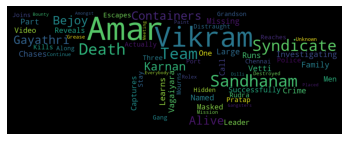

In [24]:
w3 = " ".join(title for title in fdf.name)
img = np.array(Image.open("C:\\Users\\Thispc\\Downloads\\mguns.png"))
wc = WordCloud(collocations = False, background_color ='black',mask=img).generate(w3)
plt.imshow(wc)
plt.axis("off")
plt.show()

In [25]:
from spacy import displacy

In [26]:
mdf

,name,gender
0,"Illegal, Consignment, Adaikalam, Anbu, Inspect...",male
1,"Amar, Investigation, Into, Karnan, Life, Whose...",male
2,"Karnan, Past, A, Drunkard, Drug, Addict, Woman...",male
4,"Sandhanam, Drugs, Smuggler, Boss, Named, Rolex...",male
5,"Drugs, Are, Delivered, Rolex, Will, Help, Sand...",male
6,"Veerapandian, Who, A, Pwd, Officer, Assigns, A...",male
7,"Masked, Men, Arrive, Kill, Veerapandian",male
8,"Veerapandian, Target, Masked, Men, A, Chip, Ka...",male
10,"Amar, Interrogates, Bejoy, Where, Bejoy, Tells...",male
11,"Rudra, Pratap, Is, Target, Amar, Team, Barges,...",male


In [27]:
text1= nlp(text)
for word in text1.ents:
    print(word.text,word.label_)
displacy.render(text1,style="ent",jupyter=True)


Adaikalam PERSON
Jose PERSON
Stephen Raj PERSON
Karnan ORG
Amar PERSON
Karnan GPE
Karnan GPE
two CARDINAL
Narcotics ORG
Karnan PERSON
Amar PERSON
Sandhanam GPE
Vetti GPE
Vagaiyara GPE
Sandhanam GPE
Rolex ORG
Rolex ORG
Veerapandian NORP
PWD ORG
Rudra Pratap PERSON
Rolex ORG
Sandhanam GPE
Veerapandian NORP
Veerapandian NORP
Karnan ORG
Bejoy PERSON
Bejoy PERSON
Rudra Pratap PERSON
Amar PERSON
Rudra Pratap's PERSON
Rudra Pratap PERSON
Sandhanam GPE
Rudra Pratap's ORG
Rudra Pratap PERSON
Rudra Pratap PERSON
Sandhanam GPE
Sandhanam GPE
Amar PERSON
Sandhanam GPE
Karnan ORG
Rudra Pratap PERSON
Karnan GPE
Vikram ORG
Pilot Black ORG
Vikram ORG
eleven CARDINAL
1991 DATE
Vikram ORG
three CARDINAL
Jose PERSON
Jose PERSON
Sandhanam GPE
Prabhanjan PERSON
Santhanam GPE
Jose PERSON
Santhanam GPE
Prabhanjan GPE
Jose PERSON
Veerapandian NORP
Rudra Pratap PERSON
Sandhanam GPE
Sandhanam GPE
Jose PERSON
Jose PERSON
Vikram ORG
Amar PERSON
Sandhanam GPE
Vikram ORG
Bejoy PERSON
Amar PERSON
Gayathri PERSON
Vikr

In [28]:
import category_encoders as ce

In [29]:
X=tab.drop('Gender',axis=1)
y=tab['Gender']

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test,y_train,y_test =train_test_split(X,y, test_size=0.40)

In [31]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((24, 1), (17, 1), (24,), (17,))

In [32]:
encoder = ce.OrdinalEncoder(cols=['Name'])
X_train = encoder.fit_transform(X_train)

X_test = encoder.transform(X_test)

In [33]:
from sklearn.naive_bayes import GaussianNB

classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

In [34]:
y_pred_NB = classifier.predict(X_test)
y_pred_NB

array(['male', 'male', 'male', 'male', 'male', 'male', 'male', 'male',
       'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male',
       'male'], dtype='<U6')

In [35]:
from sklearn.metrics import accuracy_score
(accuracy_score(y_test,y_pred_NB))

0.8235294117647058

In [43]:
print(classification_report(y_pred_NB, y_test))

              precision    recall  f1-score   support

      female       0.00      0.00      0.00         0
        male       1.00      0.82      0.90        17

    accuracy                           0.82        17
   macro avg       0.50      0.41      0.45        17
weighted avg       1.00      0.82      0.90        17



C:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [37]:
pred=tab.groupby('Gender').size().reset_index(name='counts')
pred

,Gender,counts
0,female,9
1,male,32


In [38]:
print(pred['Gender'].max())

male
